In [1]:
# Imports 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading in weather data
weather_dataset = pd.read_csv(r"C:\Users\18586\Desktop\Weather dataset (zenodo)\weather_prediction_dataset.csv")
weather_dataset.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [3]:
# Looking at columns
# weather_dataset.columns.tolist() # Uncomment to see full list

### Cities (numbered per map)
* #1 - Basel, Switzerland (CH)
    - City on the Rhine river in northwest Switzerland
    - CH is an abbreviation for Confoederatio Helvetica, Switzerland's Latin name; it's Latin name was used to avoid favoring of any of the 4 national Swiss languages
* #2 - Budapest, Hungary (HU)
* #3 - De Bilt, Netherlands (NL)
* #4 - Dusseldorf, Germany (DE)
    - DE is an abbreviation for Deutschland, what German people call their home country
* #5 - Dresden, Germany (DE)
* #6 - Heathrow, United Kingdom (UK)
* #7 - Kassel, Germany (DE)
* #8 - Masstricht, Netherlands (NL)
* #9 - Malmo, Sweden (SE)
* #10 - Montelimar, France (FR)
* #11 - Munchen, Germany (DE)
* #12 - Oslo, Norway (NO)
* #13 - Perpignan, France (FR)
* #14 - Roma, Italy (IT)
* #15 - Sonnblick, Austria (AT)
* #16 - Stockholm, Sweden (SE)
* #17 - Tours, France (FR)
* #18 - Ljubljana, Slovenia (SI)

### Fields (shared by all cities)
* Date
* Month
* CITY_cloud_cover
* CITY_humidity
* CITY_pressure
* CITY_global_radiation
* CITY_precipitation
* CITY_sunshine
* CITY_temp_mean
* CITY_temp_min
* CITY_temp_max

In [4]:
# Dataset size, 
weather_dataset.shape

(3654, 165)

In [5]:
# weather_dataset.describe() # Uncomment to see, going to do EDA for each city separately first

### Dataset Shape & Basic Statistics
* Ignore stats for "DATE" & "MONTH" columns
* Going to explore for #1 - Basel, Switzerland (CH) only to figure out how to explore, interpret data b/c all cities have the same fields

In [6]:
# timeData: Grabbing "DATE" & "MONTH" columns as those apply to all cities
# BaselData: Grabbing only Basel's data
timeData = weather_dataset[["DATE", "MONTH"]]
BaselData = weather_dataset[["BASEL_cloud_cover", "BASEL_humidity", "BASEL_pressure", "BASEL_global_radiation", "BASEL_precipitation", "BASEL_sunshine", "BASEL_temp_mean", "BASEL_temp_min", "BASEL_temp_max"]]

# BaselOnly: Joining timeData & BaselData on their indices to get only Basel's data
BaselOnly = timeData.merge(right=BaselData, how='inner', left_index=True, right_index=True)
BaselOnly.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6


In [7]:
BaselOnly.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,8.721323
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,-5.700000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,8.700000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,15.800000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,22.300000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,38.600000


### Basel Basic Statistics
* Ignore stats for "DATE" & "MONTH" columns
* All row counts are 3654 as expected
* !Need to figure out how each field is being measured: methods, scale, units, etc
    - Like, what does "BASEL_cloud_cover" being a float mean?

### Fields (from readme)
* cloud cover - oktas: values are [0,8], how many eighths of the sky is covered by clouds
    - Percentiles (25th, 50th, 75th) show that the mean is 5.41 & median is a 6/8, so can see Basel is generally cloudy... would want to get aggregate data to better understand cloudiness
        - Get value counts on daily/weekly/monthly/yearly time frames
        - Graph weekly/monthly averages
* humidity - Looks like Basel is quite humid, with anything above 50-65% humidity beinh humid
* pressure - usually between 950-1050 hPa
* global radiation
* precipitation, sunshine hours & temperature

#### Physical units of the variables:

| Feature (type)   | Column name 		| Description 		| Physical Unit 	|
|------------------|----------------------|-----------------------|-----------------|
| mean temperature | _temp_mean  		| mean daily temperature| in 1 &#176;C  	|
| max temperature  | _temp_max   		| max daily temperature | in 1 &#176;C  	|
| min temperature  | _temp_min   		| min daily temperature | in 1 &#176;C  	|
| cloud_cover      | _cloud_cover		| cloud cover           | oktas  		|
| global_radiation | _global_radiation 	| global radiation      | in 100 W/m2  	|
| humidity         | _humidity   		| humidity              | in 1 %  		|
| pressure         | _pressure   		| pressure              | in 1000 hPa  	|
| precipitation    | _precipitation 	| daily precipitation 	| in 10 mm  	|
| sunshine    	   | _sunshine 		| sunshine hours  	| in 0.1 hours 	|
| wind_speed       | _wind_gust  		| wind gust    		| in 1 m/s 		|
| wind_gust        | _wind_speed 		| wind speed   		| in 1 m/s 		|

In [8]:
# Reading in picnic labels data
picnic_labels = pd.read_csv(r"C:\Users\18586\Desktop\Weather dataset (zenodo)\weather_prediction_picnic_labels.csv")
picnic_labels.head()

,DATE,BASEL_picnic_weather,BUDAPEST_picnic_weather,DE_picnic_weather,DRESDEN_picnic_weather,DUSSELDORF_picnic_weather,HEATHROW_picnic_weather,KASSEL_picnic_weather,LJUBLJANA_picnic_weather,MAASTRICHT_picnic_weather,MALMO_picnic_weather,MONTELIMAR_picnic_weather,MUENCHEN_picnic_weather,OSLO_picnic_weather,PERPIGNAN_picnic_weather,SONNBLICK_picnic_weather,STOCKHOLM_picnic_weather,TOURS_picnic_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# timeData: Grabbing "DATE" column as those apply to all cities
# BaselData: Grabbing only Basel's data
labelTimeData = picnic_labels[["DATE"]]
BaselLabelData = picnic_labels[["BASEL_picnic_weather"]]

# BaselOnly: Joining timeData & BaselData on their indices to get only Basel's data
BaselLabelsOnly = labelTimeData.merge(right=BaselLabelData, how='inner', left_index=True, right_index=True)
BaselLabelsOnly.head()

,DATE,BASEL_picnic_weather
0,20000101,False
1,20000102,False
2,20000103,False
3,20000104,False
4,20000105,False


In [10]:
# BaselAllData: Complete Basel data with labels
BaselAllData = BaselOnly.merge(right=BaselLabelsOnly[["BASEL_picnic_weather"]], how='inner', left_index=True, right_index=True)
BaselAllData.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BASEL_picnic_weather
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,False
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,False
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,False
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,False
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,False


In [11]:
# Looking at correlation of all features with label column
BaselAllData[BaselAllData.columns[2:]].corr()["BASEL_picnic_weather"]

BASEL_cloud_cover        -0.424554
BASEL_humidity           -0.442578
BASEL_pressure            0.040971
BASEL_global_radiation    0.655851
BASEL_precipitation      -0.257213
BASEL_sunshine            0.613136
BASEL_temp_mean           0.561821
BASEL_temp_min            0.455671
BASEL_temp_max            0.600784
BASEL_picnic_weather      1.000000
Name: BASEL_picnic_weather, dtype: float64

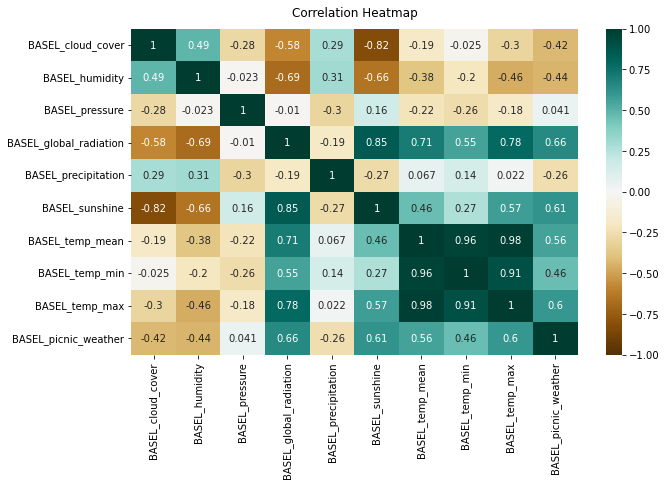

In [12]:
# Increase the size of the heatmap.
plt.figure(figsize=(10, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap_Basel = sns.heatmap(BaselAllData[BaselAllData.columns[2:]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap_Basel.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### What exactly constitutes a picnic day anyways?
* ^^ Question to answer because this'll define everything afterwards

### Questions/Notes
* Is there a way to check the correlation of the date & month columns with the label column? A 'lil different than all the other features because those are time-dependent... and seasonality definitely affects weather-niceness, which isn't something I can ignore
* Will all cities have a similar correlation heatmap?
* Can only determine picnic weather from daily statistics, no hourly granularity

### Sources
* https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable
* https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

###  DecisionTreeClassifier
* Skeleton for later work

In [13]:
# Features & labels
BaselAllData_X = BaselAllData[BaselAllData.columns[2:-1]]
BaselAllData_y = BaselAllData[["BASEL_picnic_weather"]]

# Creating DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [14]:
# Fitting DecisionTreeClassifier to X & y
clf.fit(BaselAllData_X, BaselAllData_y)

DecisionTreeClassifier(random_state=0)

In [15]:
# Making predictions
preds = clf.predict(BaselAllData_X)
preds

array([False, False, False, ..., False, False, False])

In [16]:
# Scoring, 1.0 as expected b/c this is scoring on the same data the tree was trained with, overfitting! ((:
clf.score(BaselAllData_X, BaselAllData_y)

1.0